# Connected Component Labeling 

In this demo, we will apply a threshold to a gray-scale image and we are going to label with different colors the resulting connected components.

In [1]:
## Loading the necessary libraries
# Directive to plot and dispaly images inline on the jupyter-notebook
%matplotlib notebook
import matplotlib.pylab as plt # allows display of images and complex plots
import numpy as np # array processing library, makes python somewhat similar to "Matlab"
import cv2  # OpenCV image processing library
import skimage  # Image processing open-source toolbox

The first step is to load our sample image and display it. It is also good to extract some of its statistics (max, min, etc.), and the image data type. The data type is very important (not in this example). You need the proper data type when performing image operatins (+, -, x, /), otherwise you might get overflow (underflow) and rounding problems. 

Image info:
Shape: (768, 605)
Max.: 233
Min.: 0
Data type: uint8


<IPython.core.display.Javascript object>


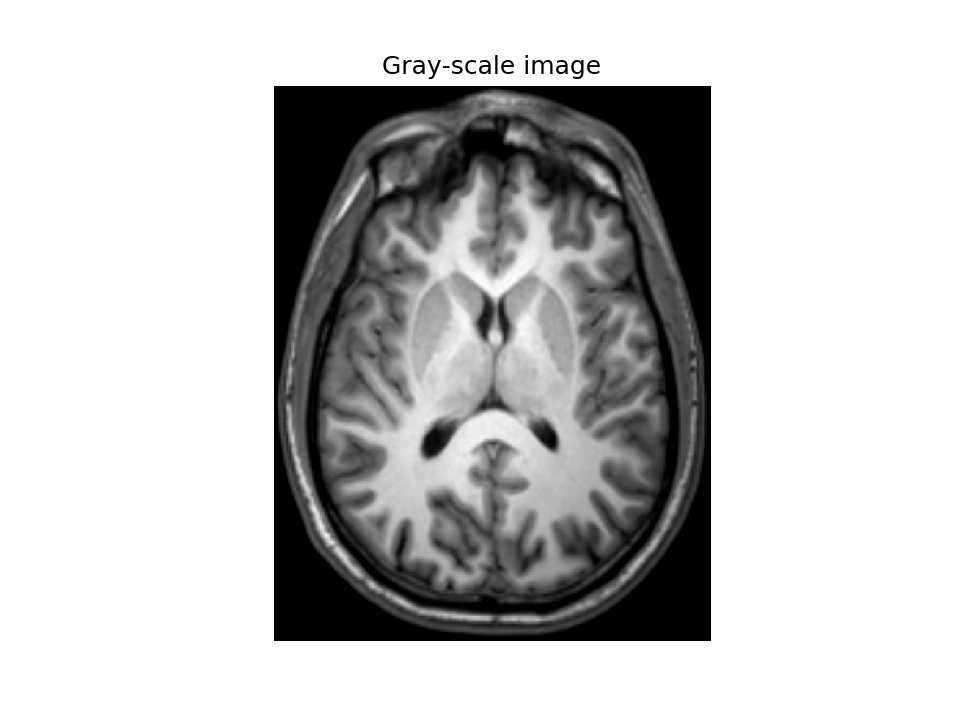

In [2]:
img = cv2.imread('../Figures/axial_brain.png',cv2.IMREAD_GRAYSCALE ) # load image as gray-scale image
# Get some info of the image
print "Image info:"
print "Shape:",img.shape
print "Max.:",img.max()
print "Min.:", img.min()
print "Data type:", img.dtype

#Display image on the jupyter-notebook
plt.imshow(img,cmap = "gray")
plt.title("Gray-scale image")
plt.axis('off') # Remove axis of the image. ALways use when displaying images
plt.show()

The most common type of thresholds are lower (<) and upper (>=) thresholds. The upper threshold of an image is the complement of the lower threshold for the same threshold value. This means that if you sum them, you will get a completely white image. After you threshold an image, the result ia a binary image, i.e. its data type is bool.

Data type of the outputs of the thresholds
Upper threshold: bool
Lower threshold: bool


(-0.5, 604.5, 767.5, -0.5)

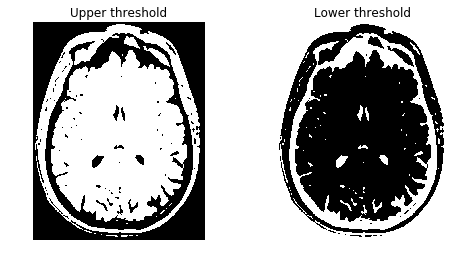

In [14]:
t = 60 # threshold value
img_upper = img >= t # applying upper threshold
img_lower = img < t # applying lower threshold

print "Data type of the outputs of the thresholds"
print "Upper threshold:", img_upper.dtype
print "Lower threshold:", img_lower.dtype


plt.figure(figsize = (8,4)) # Creates a figure object and controls its size
plt.subplot(1, 2, 1) # Subplots (nrows, ncols, current plot position)
plt.imshow(img_upper,cmap = "gray") # displays upper threshold
plt.title("Upper threshold")
plt.axis('off')

plt.subplot(1, 2, 2) # Goes to the second plot (on the right)
plt.imshow(img_lower,cmap = "gray") # displays lower threshold
plt.title("Lower threshold")
plt.axis('off')

The next step is to label the connected components, i.e. "white islands" in the binary image. In order to do that, we will use a function from scikit-image.

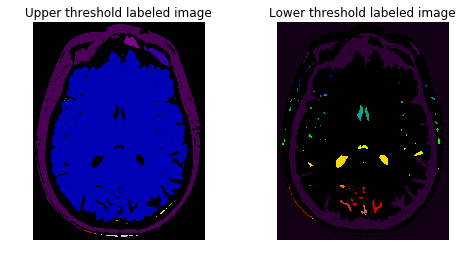

In [15]:
# Calling scikit-image function for labeling connected components. background=0 means
# we don't want to label the background
labeled_upper = skimage.measure.label(img_upper, background=0)
labeled_lower = skimage.measure.label(img_lower, background=0)

plt.figure(figsize = (8,4)) 
plt.subplot(1, 2, 1) 
plt.imshow(labeled_upper,cmap = "spectral") 
plt.title("Upper threshold labeled image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(labeled_lower,cmap = "spectral") 
plt.title("Lower threshold labeled image")
plt.axis('off')
plt.show()